In [ ]:
# The effectiveness of cancer prediction system helps people to better understand risk of cancer at a low cost.
# It also helps people to take appropriate measures and improve decision making
# Key Message(s): Your report should focus on 1 (or at most 2) key message(s) that are crucial for the audience to understand.
# These could be insights related to risk factors, demographic trends, symptom prevalence, or other important findings from the dataset.
# Key message: 1. Lifestyle habits and 2. their associated symptoms
# 1. Lifestyle habits: SMOKING, ALCOHOL CONSUMING, PEER_PRESSURE (?)
# 2. Associated Symptons: YELLOW_FINGERS, FATIGUE, WHEEZING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN 

In [ ]:
# Questions to talk about 


In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

cancer_w_NA = pd.read_csv("/Users/isaacleongwenxuan/Desktop/4.1/DSA312/Group/DSA312/Data/lung cancer survey.csv")
cancer_w_NA

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Counting the number of NAs in each column
cancer_w_NA.isna().sum()
cancer = cancer_w_NA.dropna()
len(cancer) #9,001 rows left - 99 rows dropped

GENDER                   99
AGE                      99
SMOKING                  99
YELLOW_FINGERS           99
ANXIETY                  99
PEER_PRESSURE            99
CHRONIC DISEASE          99
FATIGUE                  99
ALLERGY                  99
WHEEZING                 99
ALCOHOL CONSUMING        99
COUGHING                 99
SHORTNESS OF BREATH      99
SWALLOWING DIFFICULTY    99
CHEST PAIN               99
LUNG_CANCER              99
dtype: int64

9001

In [41]:
#Checking number of people per age group
cancer.groupby('AGE')['AGE'].count()

AGE
21.0       1
44.0       2
46.0    2030
47.0     110
48.0     116
49.0      97
50.0     177
51.0     186
52.0     173
53.0     136
54.0     159
55.0     152
56.0     168
57.0     195
58.0     184
59.0     233
60.0     270
61.0     235
62.0     263
63.0     242
64.0     226
65.0     226
66.0     201
67.0     260
68.0     218
69.0     260
70.0     209
71.0     167
72.0     185
73.0     155
74.0     140
75.0     148
76.0     150
77.0    1174
78.0     150
79.0       1
81.0       2
Name: AGE, dtype: int64

In [81]:
#dropped the outlier
cancer = cancer[cancer['AGE'] > 21]

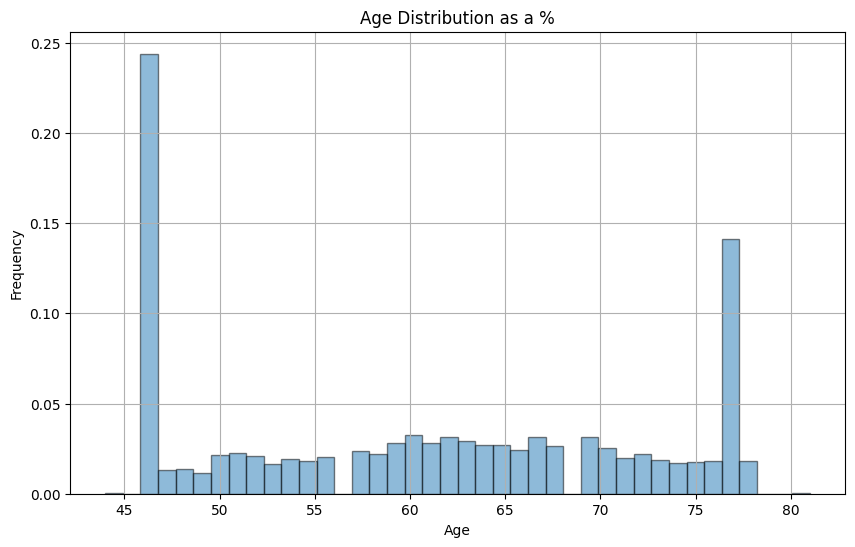

In [85]:
# Showing proportions of Age distribution
plt.figure(figsize=(10, 6))
plt.hist(cancer['AGE'],
        bins = 40,
        density = True,
        cumulative = False,
        edgecolor = 'black',
        alpha = 0.5)
plt.title('Age Distribution as a %')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show();

<Axes: xlabel='AGE'>

Text(0.5, 1.0, 'No. of patients and in each age group & its survivors')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of Patients')

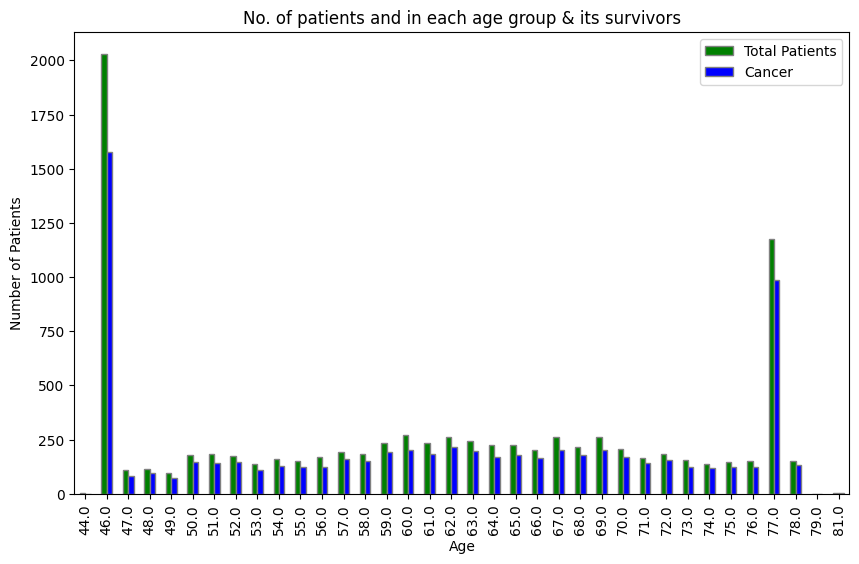

In [91]:
cancer.groupby('AGE')['LUNG_CANCER'].agg(['count', 'sum']).plot(
    kind='bar',
    figsize=(10, 6),
    color=['green', 'blue'],
    edgecolor='grey'
)

# Customize the plot
plt.title('No. of patients and in each age group & its survivors')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(['Total Patients', 'Cancer'])

# Display the plot
plt.show()

In [117]:
# Spilt into Cancer & No Cancer datasets
cancer_yes = cancer[cancer['LUNG_CANCER'] == 1]
cancer_no = cancer[cancer['LUNG_CANCER'] == 0]
len(cancer_yes)
len(cancer_no)

#proportion of Cancer/Non-cancer patients who smokes
len(cancer_yes[cancer_yes['SMOKING'] == 1]) / len(cancer_yes) #0.537, 54% of people who has cancer, smokes.
len(cancer_no[cancer_no['SMOKING'] == 1]) / len(cancer_no) #0.457, slightly less than 50% of people who has no cancer, smokes
# thus, almost equal prop of people who smokes have cancer

#proportion of Cancer/Non-cancer patients who consumes alcohol
len(cancer_yes[cancer_yes['ALCOHOL CONSUMING'] == 1]) / len(cancer_yes) #0.576, 57% of people who has cancer, consumes alcohol.
len(cancer_no[cancer_no['ALCOHOL CONSUMING'] == 1]) / len(cancer_no) #0.315, 31.5% of people who has no cancer, consumes alcohol.
# thus, out of the people who has cancer, a larger percentage of them consumes alcohol.

7245

1755

0.5365079365079365

0.456980056980057

0.5762594893029676

0.3145299145299145

In [259]:
# Corr analysis - task 1 
cancer[['LUNG_CANCER','SMOKING', 'PEER_PRESSURE','ALCOHOL CONSUMING','AGE']].corr()
# Output: Smoking and Peer pressure has barely any corr. Alcohol consumption has the most corr w lung cancer of about 0.207659
# Added age too but barely any corr too

,LUNG_CANCER,SMOKING,PEER_PRESSURE,ALCOHOL CONSUMING,AGE
LUNG_CANCER,1.000000,0.063074,0.057908,0.207659,0.052523
SMOKING,0.063074,1.000000,-0.026481,-0.019939,0.008597
PEER_PRESSURE,0.057908,-0.026481,1.000000,-0.057384,0.007555
ALCOHOL CONSUMING,0.207659,-0.019939,-0.057384,1.000000,-0.004965
AGE,0.052523,0.008597,0.007555,-0.004965,1.000000


,LUNG_CANCER,YELLOW_FINGERS,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,1.000000,0.217762,-0.080372,-0.000414,-0.050093,0.108176,-0.012796
YELLOW_FINGERS,0.217762,1.000000,-0.043450,0.014883,0.016048,0.065091,-0.018293
WHEEZING,-0.080372,-0.043450,1.000000,0.049138,0.010180,0.027963,0.009885
COUGHING,-0.000414,0.014883,0.049138,1.000000,0.034095,-0.083149,0.021032
SHORTNESS OF BREATH,-0.050093,0.016048,0.010180,0.034095,1.000000,-0.008706,-0.006708
SWALLOWING DIFFICULTY,0.108176,0.065091,0.027963,-0.083149,-0.008706,1.000000,0.007457
CHEST PAIN,-0.012796,-0.018293,0.009885,0.021032,-0.006708,0.007457,1.000000


<Figure size 800x600 with 0 Axes>

([<matplotlib.axis.XTick at 0x176c93ef0>,
 [Text(0, 0, 'LUNG_CANCER'),
  Text(1, 0, 'YELLOW_FINGERS'),
  Text(2, 0, 'WHEEZING'),
  Text(3, 0, 'COUGHING'),
  Text(4, 0, 'SHORTNESS OF BREATH'),
  Text(5, 0, 'SWALLOWING DIFFICULTY'),
  Text(6, 0, 'CHEST PAIN')])

([<matplotlib.axis.YTick at 0x16ac24500>,
 [Text(0, 0, 'LUNG_CANCER'),
  Text(0, 1, 'YELLOW_FINGERS'),
  Text(0, 2, 'WHEEZING'),
  Text(0, 3, 'COUGHING'),
  Text(0, 4, 'SHORTNESS OF BREATH'),
  Text(0, 5, 'SWALLOWING DIFFICULTY'),
  Text(0, 6, 'CHEST PAIN')])

Text(0.5, 1.0, 'Correlation Matrix of Iris Features')

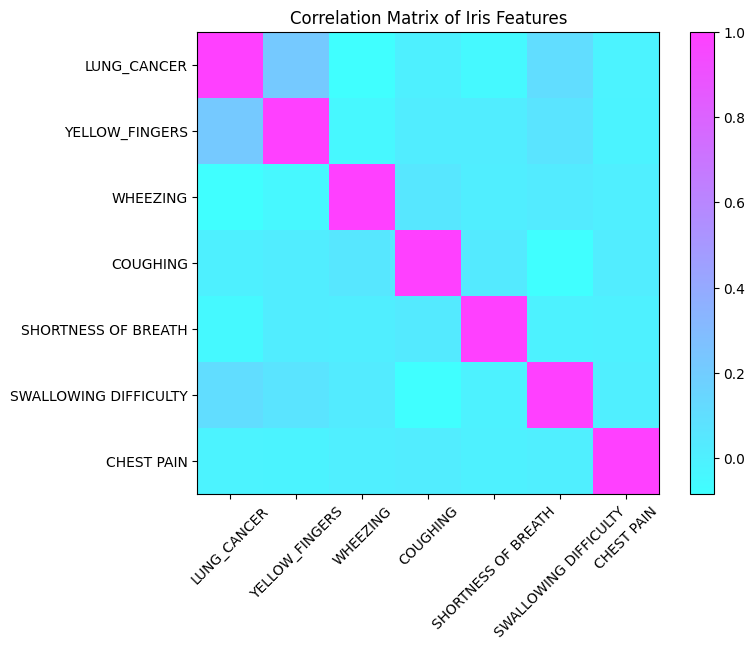

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1.0,78.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,46.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
10,1.0,65.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,1.0,77.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,0.0,73.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8994,0.0,65.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [177]:
# Prepare Corr matrix - #LEFT OUT FATIGUE CAUSE MY CODE CANT GET IT
data = cancer.loc[:, ['LUNG_CANCER','YELLOW_FINGERS', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
data[['LUNG_CANCER','YELLOW_FINGERS', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']].corr()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using plt.imshow()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='cool', alpha = 0.75)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Iris Features')
plt.show()

# Output: most commomn sympton is Yellow_Fingers

In [193]:
#Checking for the proportion of cancer patients who has yellow fingers vs proportion of cancer free patients who has yellow fingers
# Reason for check : Corr does not equal causation
len(cancer_yes[cancer_yes['YELLOW_FINGERS'] == 1])/len(cancer_yes) #58.2%
len(cancer_no[cancer_no['YELLOW_FINGERS'] == 1])/len(cancer_no) #30.7%
# I dont think its very a persuasive causation

# diff approach: Check for rly convincing causations (aka clear symptons)
# WHEEZING
len(cancer_yes[cancer_yes['WHEEZING'] == 1])/len(cancer_yes) #58.2%
len(cancer_no[cancer_no['WHEEZING'] == 1])/len(cancer_no) #30.7%
# COUGHING
len(cancer_yes[cancer_yes['COUGHING'] == 1])/len(cancer_yes) #59.39%
len(cancer_no[cancer_no['COUGHING'] == 1])/len(cancer_no) #59.43%
# SHORTNESS OF BREATH
len(cancer_yes[cancer_yes['SHORTNESS OF BREATH'] == 1])/len(cancer_yes) #68.7%
len(cancer_no[cancer_no['SHORTNESS OF BREATH'] == 1])/len(cancer_no) #74.5%
# SWALLOWING DIFFICULTY
len(cancer_yes[cancer_yes['SWALLOWING DIFFICULTY'] == 1])/len(cancer_yes) #37.3%
len(cancer_no[cancer_no['SWALLOWING DIFFICULTY'] == 1])/len(cancer_no) #24.3%
# CHEST PAIN
len(cancer_yes[cancer_yes['CHEST PAIN'] == 1])/len(cancer_yes) #62.5%
len(cancer_no[cancer_no['CHEST PAIN'] == 1])/len(cancer_no) #64.0%

# nvm, doesnt rly show anything

0.581504485852312

0.3071225071225071

0.47066942719116633

0.5720797720797721

0.5937888198757764

0.5943019943019943

0.6866804692891649

0.7447293447293447

0.37336093857832986

0.2433048433048433

0.6248447204968944

0.6404558404558405

In [159]:
# Analysis 2 with dataset only containing lung cancer patients
cancer_yes[['LUNG_CANCER','SMOKING','ALCOHOL CONSUMING']].corr()
# correlation cannot be defined (NA) because when all the values in a column are the same, the SD is zero, which makes correlation undefined

,LUNG_CANCER,SMOKING,ALCOHOL CONSUMING
LUNG_CANCER,NaN,NaN,NaN
SMOKING,NaN,1.000000,-0.038605
ALCOHOL CONSUMING,NaN,-0.038605,1.000000


AGE
44.0     50.000000
46.0     77.733990
47.0     73.636364
48.0     82.758621
49.0     74.226804
50.0     81.920904
51.0     77.419355
52.0     83.815029
53.0     81.617647
54.0     81.761006
55.0     80.921053
56.0     73.809524
57.0     83.589744
58.0     82.608696
59.0     83.261803
60.0     75.555556
61.0     78.723404
62.0     82.889734
63.0     80.991736
64.0     75.221239
65.0     80.088496
66.0     82.587065
67.0     77.307692
68.0     82.568807
69.0     77.692308
70.0     82.296651
71.0     85.029940
72.0     85.405405
73.0     78.709677
74.0     86.428571
75.0     83.108108
76.0     83.333333
77.0     83.901193
78.0     88.000000
79.0    100.000000
81.0    100.000000
Name: count, dtype: float64

<BarContainer object of 36 artists>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Proportion of Lung Cancer Patients (%)')

Text(0.5, 1.0, 'Proportion of Lung Cancer Patients by Age Group')

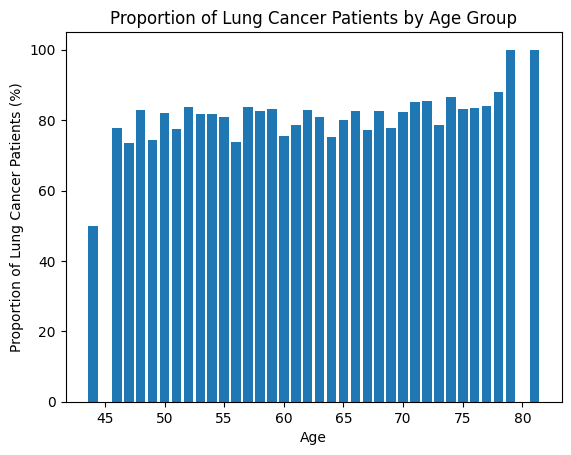

In [263]:
#Proportion of people in each age group with cancer
age_counts = cancer[cancer['LUNG_CANCER'] == 1]['AGE'].value_counts().sort_index() 
age_group_counts = cancer['AGE'].value_counts().sort_index()

proportion = (age_counts / age_group_counts) * 100
proportion

# Visualisation
plt.bar(proportion.index, proportion.values)
plt.xlabel('Age')
plt.ylabel('Proportion of Lung Cancer Patients (%)')
plt.title('Proportion of Lung Cancer Patients by Age Group')
plt.show()

# rising trend? 





Isolate Cancer - yes & Cancer - no

Cancer - yes : 70% have yellow fingers, 30% no yellow 
Cancer - no : 20% have yellow fingers, 80% no yellow 